In [1]:
'''!pip install wordcloud
!pip install textblob'''

'!pip install wordcloud\n!pip install textblob'

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is B0F3-63FF

 Directory of C:\Users\weberf\Desktop\Fernando\CCT\CA

30/07/2023  12:31    <DIR>          .
30/07/2023  12:31    <DIR>          ..
30/07/2023  12:25    <DIR>          .ipynb_checkpoints
30/07/2023  12:31           137,598 dashboard.ipynb
29/07/2023  14:24            18,402 mongodb_mysql_comparison.xlsx
29/07/2023  14:27               916 outputMongoDB_WorkloadA.txt
29/07/2023  14:27             2,241 outputMySQL_WorkloadA.txt
29/07/2023  14:27       230,567,856 ProjectTweets.csv
29/07/2023  15:34    <DIR>          SS
29/07/2023  14:28             7,395 Tweet_input_mysql.ipynb
29/07/2023  15:34    <DIR>          tweets_output
29/07/2023  14:28            21,899 tweets_output_spark.ipynb
30/07/2023  12:25        10,859,702 tweets_sentiment_analysis.ipynb
               8 File(s)    241,616,009 bytes
               5 Dir(s)  61,337,792,512 bytes free


In [4]:
filepath = "tweets_output/tweets_output.csv"

In [5]:
df = pd.read_csv(filepath, parse_dates = True, index_col = 'timestamp')

In [6]:
df.head()

,year,month,day,text,sentiment
timestamp,,,,,
2009-04-07 06:19:45,2009,4,7,Awww that s a bummer You shoulda got David Ca...,Positive
2009-04-07 06:19:49,2009,4,7,s upset that he can t update his Facebook by t...,Neutral
2009-04-07 06:19:53,2009,4,7,I dived many times for the ball Managed to sa...,Positive
2009-04-07 06:19:57,2009,4,7,my whole body feels itchy and like its on fire,Positive
2009-04-07 06:19:57,2009,4,7,no it s not behaving at all i m mad why am i ...,Negative


In [7]:
tweet = df.copy()

#tweet.drop(['year', 'month', 'day'],axis=1, inplace = True)
tweet.head()

,year,month,day,text,sentiment
timestamp,,,,,
2009-04-07 06:19:45,2009,4,7,Awww that s a bummer You shoulda got David Ca...,Positive
2009-04-07 06:19:49,2009,4,7,s upset that he can t update his Facebook by t...,Neutral
2009-04-07 06:19:53,2009,4,7,I dived many times for the ball Managed to sa...,Positive
2009-04-07 06:19:57,2009,4,7,my whole body feels itchy and like its on fire,Positive
2009-04-07 06:19:57,2009,4,7,no it s not behaving at all i m mad why am i ...,Negative


In [8]:
# check missing values
tweet.isna().sum()


year         0
month        0
day          0
text         0
sentiment    0
dtype: int64

In [9]:
# shape
tweet.shape

(1600000, 5)

In [10]:
#Removing Stop Words
stopwords

tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head()

timestamp
2009-04-07 06:19:45    Awww s bummer You shoulda got David Carr Third...
2009-04-07 06:19:49    s upset t update Facebook texting might cry re...
2009-04-07 06:19:53    I dived many times ball Managed save The rest ...
2009-04-07 06:19:57                          whole body feels itchy fire
2009-04-07 06:19:57                             s behaving m mad I t see
Name: text, dtype: object

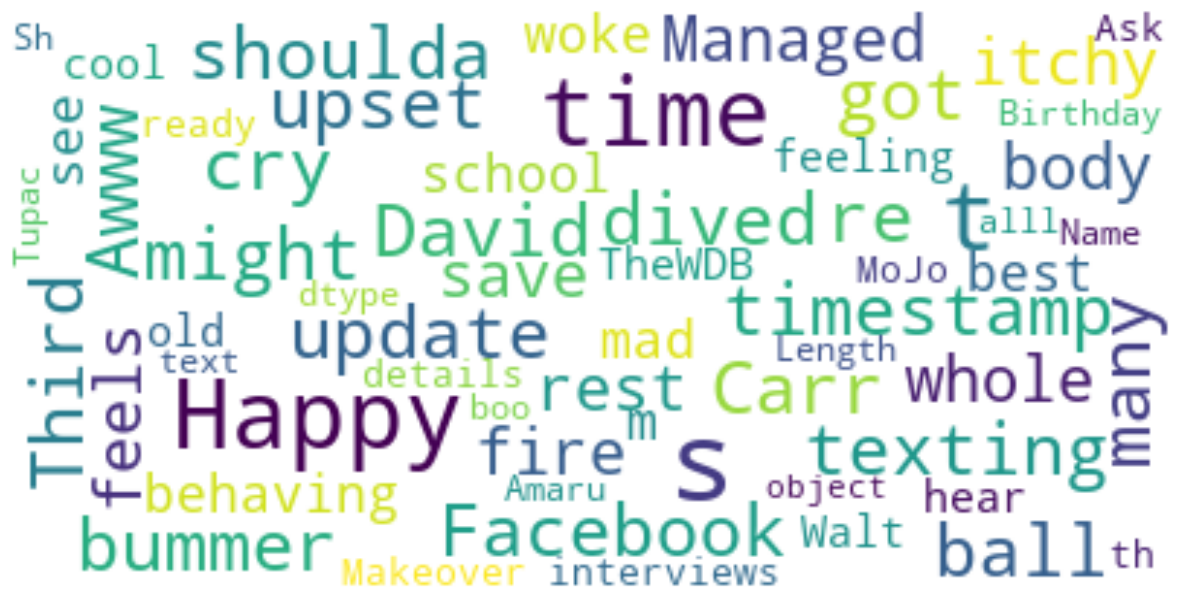

In [11]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

Positive    696066
Neutral     566992
Negative    336942
Name: sentiment, dtype: int64


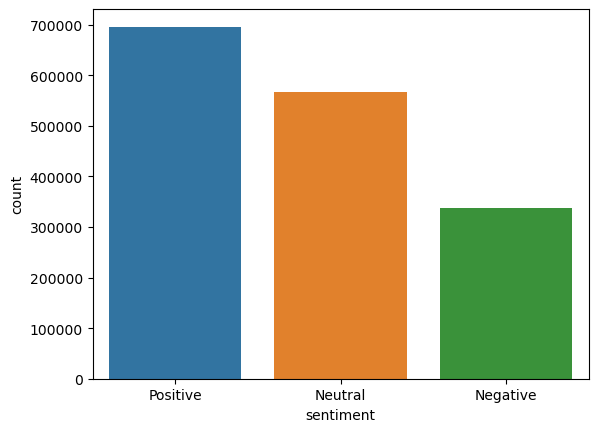

In [12]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

In [13]:
# count sentiment
tweet_count1 = tweet.groupby(['timestamp','sentiment'])['text'].count().reset_index().rename(columns={'text':'count'})
tweet_count1.head()


,timestamp,sentiment,count
0,2009-04-07 06:19:45,Positive,1
1,2009-04-07 06:19:49,Neutral,1
2,2009-04-07 06:19:53,Positive,1
3,2009-04-07 06:19:57,Negative,1
4,2009-04-07 06:19:57,Positive,1


In [14]:
# format timestamp
tweet_count1['timestamp'] = pd.to_datetime(tweet_count1['timestamp'])

In [74]:
# check missing values
tweet_count1.head()

,timestamp,sentiment,count
0,2009-04-07 06:19:45,Positive,1
1,2009-04-07 06:19:49,Neutral,1
2,2009-04-07 06:19:53,Positive,1
3,2009-04-07 06:19:57,Negative,1
4,2009-04-07 06:19:57,Positive,1


In [75]:
filepath = "tweets_output/tweets_counts.csv"
tweet_count1.set_index('timestamp').to_csv(filepath)

In [16]:
tweet_pivoted = tweet_count1.pivot(index='timestamp',columns=['sentiment'], values='count')

In [17]:
tweet_pivoted.head()

sentiment,Negative,Neutral,Positive
timestamp,,,
2009-04-07 06:19:45,NaN,NaN,1.0
2009-04-07 06:19:49,NaN,1.0,NaN
2009-04-07 06:19:53,NaN,NaN,1.0
2009-04-07 06:19:57,1.0,NaN,1.0
2009-04-07 06:20:00,NaN,NaN,1.0


In [18]:
tweet_pivoted_hourly = tweet_pivoted.resample("H").sum()

In [19]:
tweet_pivoted_hourly.tail(5)

sentiment,Negative,Neutral,Positive
timestamp,,,
2009-06-25 14:00:00,621.0,731.0,703.0
2009-06-25 15:00:00,616.0,819.0,687.0
2009-06-25 16:00:00,651.0,706.0,617.0
2009-06-25 17:00:00,632.0,787.0,657.0
2009-06-25 18:00:00,375.0,364.0,288.0


<function matplotlib.pyplot.show(close=None, block=None)>

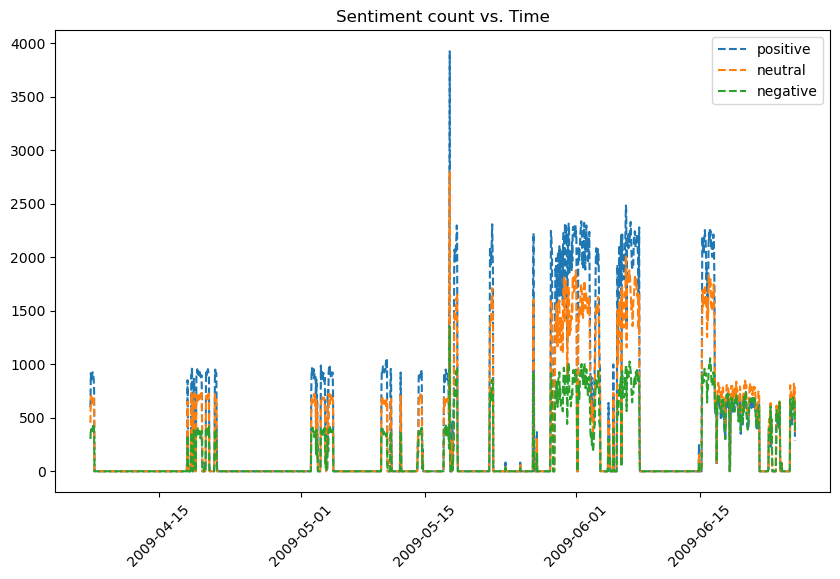

In [20]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Sentiment count vs. Time")

plt1=plt.plot(tweet_pivoted_hourly['Positive'], '--', label='positive')
plt2=plt.plot(tweet_pivoted_hourly['Neutral'], '--', label='neutral')
plt3=plt.plot(tweet_pivoted_hourly['Negative'], '--', label='negative')

plt.legend()
plt.show

In [21]:
tweet_pivoted_hourly = tweet_pivoted_hourly.replace(0, np.nan)

In [22]:
tweet_pivoted_hourly['Negative'].interpolate(method='time', inplace=True)
tweet_pivoted_hourly['Neutral'].interpolate(method='time', inplace=True)
tweet_pivoted_hourly['Positive'].interpolate(method='time', inplace=True)

In [23]:
tweet_pivoted_hourly.head()

sentiment,Negative,Neutral,Positive
timestamp,,,
2009-04-07 06:00:00,301.0,453.0,599.0
2009-04-07 07:00:00,396.0,694.0,917.0
2009-04-07 08:00:00,379.0,707.0,854.0
2009-04-07 09:00:00,395.0,687.0,868.0
2009-04-07 10:00:00,375.0,663.0,854.0


<function matplotlib.pyplot.show(close=None, block=None)>

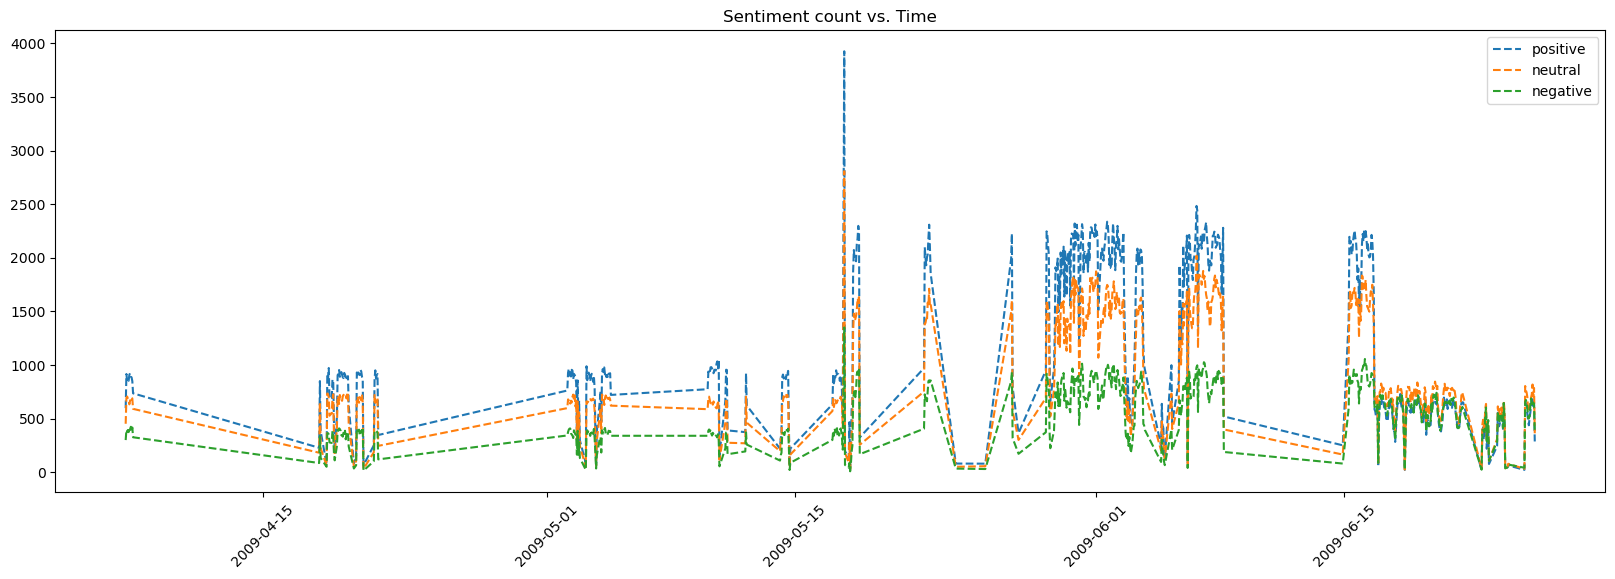

In [24]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=45)
plt.title("Sentiment count vs. Time")

plt1=plt.plot(tweet_pivoted_hourly['Positive'], '--', label='positive')
plt2=plt.plot(tweet_pivoted_hourly['Neutral'], '--', label='neutral')
plt3=plt.plot(tweet_pivoted_hourly['Negative'], '--', label='negative')

plt.legend()
plt.show

In [25]:
# "score" is defined as percent of positive tweets minus percent of negative tweets
tweet_pivoted_hourly['score'] = (tweet_pivoted_hourly['Positive'] - tweet_pivoted_hourly['Negative']) / (tweet_pivoted_hourly['Positive'] + tweet_pivoted_hourly['Neutral'] + tweet_pivoted_hourly['Negative'])

In [26]:
tweet_pivoted_hourly.head()

sentiment,Negative,Neutral,Positive,score
timestamp,,,,
2009-04-07 06:00:00,301.0,453.0,599.0,0.220251
2009-04-07 07:00:00,396.0,694.0,917.0,0.259591
2009-04-07 08:00:00,379.0,707.0,854.0,0.244845
2009-04-07 09:00:00,395.0,687.0,868.0,0.242564
2009-04-07 10:00:00,375.0,663.0,854.0,0.253171


<function matplotlib.pyplot.show(close=None, block=None)>

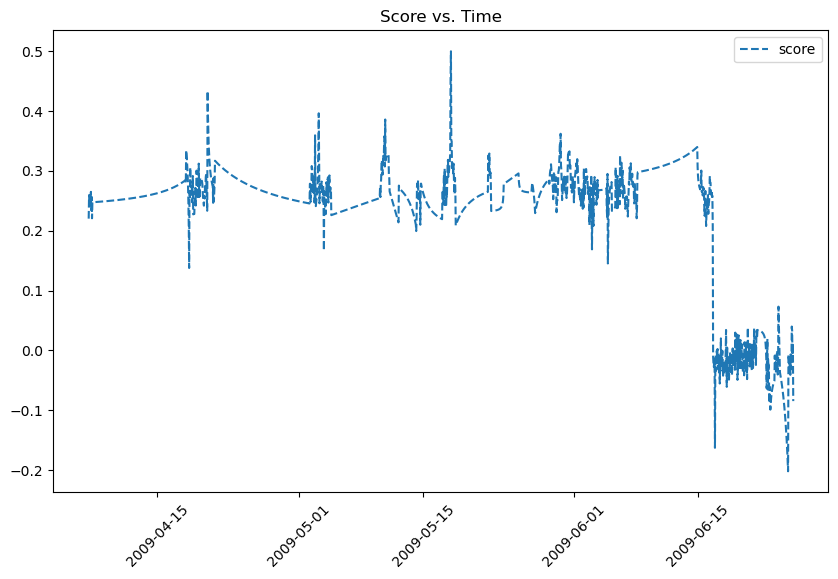

In [27]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Score vs. Time")

plt1=plt.plot(tweet_pivoted_hourly['score'], '--', label='score')

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

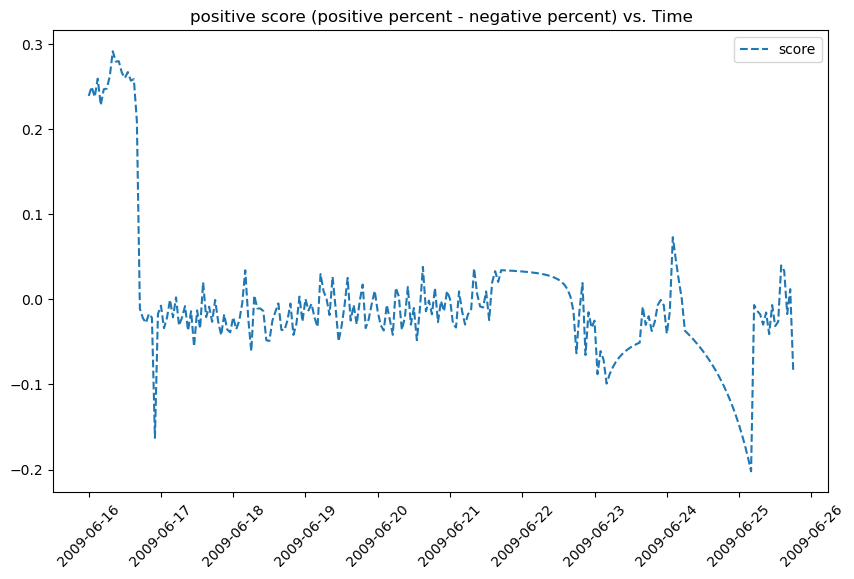

In [28]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("positive score (positive percent - negative percent) vs. Time")

lin=plt.plot(tweet_pivoted_hourly['score'].loc['2009-06-16':], '--', label='score')

plt.legend()
plt.show

In [29]:
all_words = []
all_words = [word for i in df.text for word in i.split()]
pos_words = df['text'][df['sentiment'] == 'Positive']
neg_words = df['text'][df['sentiment'] == 'Negative']
neutral_words = df['text'][df['sentiment'] == 'Neutral']
# show_wordcloud(pos_words , 'POSITIVE')
# show_wordcloud(neg_words , 'NEGATIVE')
# show_wordcloud(neutral_words , 'NEUTRAL')

def get_freq(word_list):
    freq = Counter(word_list).most_common(100)
    freq = pd.DataFrame(freq)
    freq.columns = ['word', 'frequency']
    return freq

all_freq = get_freq(all_words)
pos_freq = get_freq([word for i in pos_words for word in i.split()])
neg_freq = get_freq([word for i in neg_words for word in i.split()])

freq = pd.merge(all_freq,pos_freq,on='word',how='left').rename(columns={'frequency_x':'total','frequency_y':'pos'})
freq = pd.merge(freq,neg_freq,on='word',how='left').rename(columns={'frequency':'neg'}).fillna(0)
freq['score'] = (freq['pos'] - freq['neg'] ) / freq['total']

neg_freq_filtered = freq[(freq['score'] < 0.2) & (freq['neg'] > 0)].head(40).sort_values('score',ascending = True)

neg_freq_filtered.head(40)

,word,total,pos,neg,score
93,been,31485,0.0,9133.0,-0.290075
97,has,30844,0.0,8371.0,-0.271398
75,still,36757,0.0,9894.0,-0.269173
96,last,31002,0.0,7880.0,-0.254177
73,home,37722,0.0,9472.0,-0.251100
95,he,31127,0.0,7385.0,-0.237254
90,off,32502,0.0,7394.0,-0.227494
46,no,56653,21396.0,16482.0,0.086739
27,not,92334,39035.0,29733.0,0.100743
84,im,34992,15858.0,11135.0,0.134974


In [30]:
#Positive 
freq[(freq['score'] >0.4) & (freq['pos'] !=0)].head(10).sort_values('score',ascending = False)

,word,total,pos,neg,score
99,lol,30113,29040.0,0.0,0.964368
50,love,53277,49780.0,0.0,0.934362
38,good,72635,67127.0,0.0,0.924169
79,new,35740,30701.0,0.0,0.859010
78,more,35812,30580.0,0.0,0.853904
81,much,35528,28917.0,0.0,0.813921
85,re,34280,20197.0,0.0,0.589177
70,ll,39985,21056.0,0.0,0.526597
87,well,33858,17452.0,0.0,0.515447
62,really,45213,31365.0,13171.0,0.402406


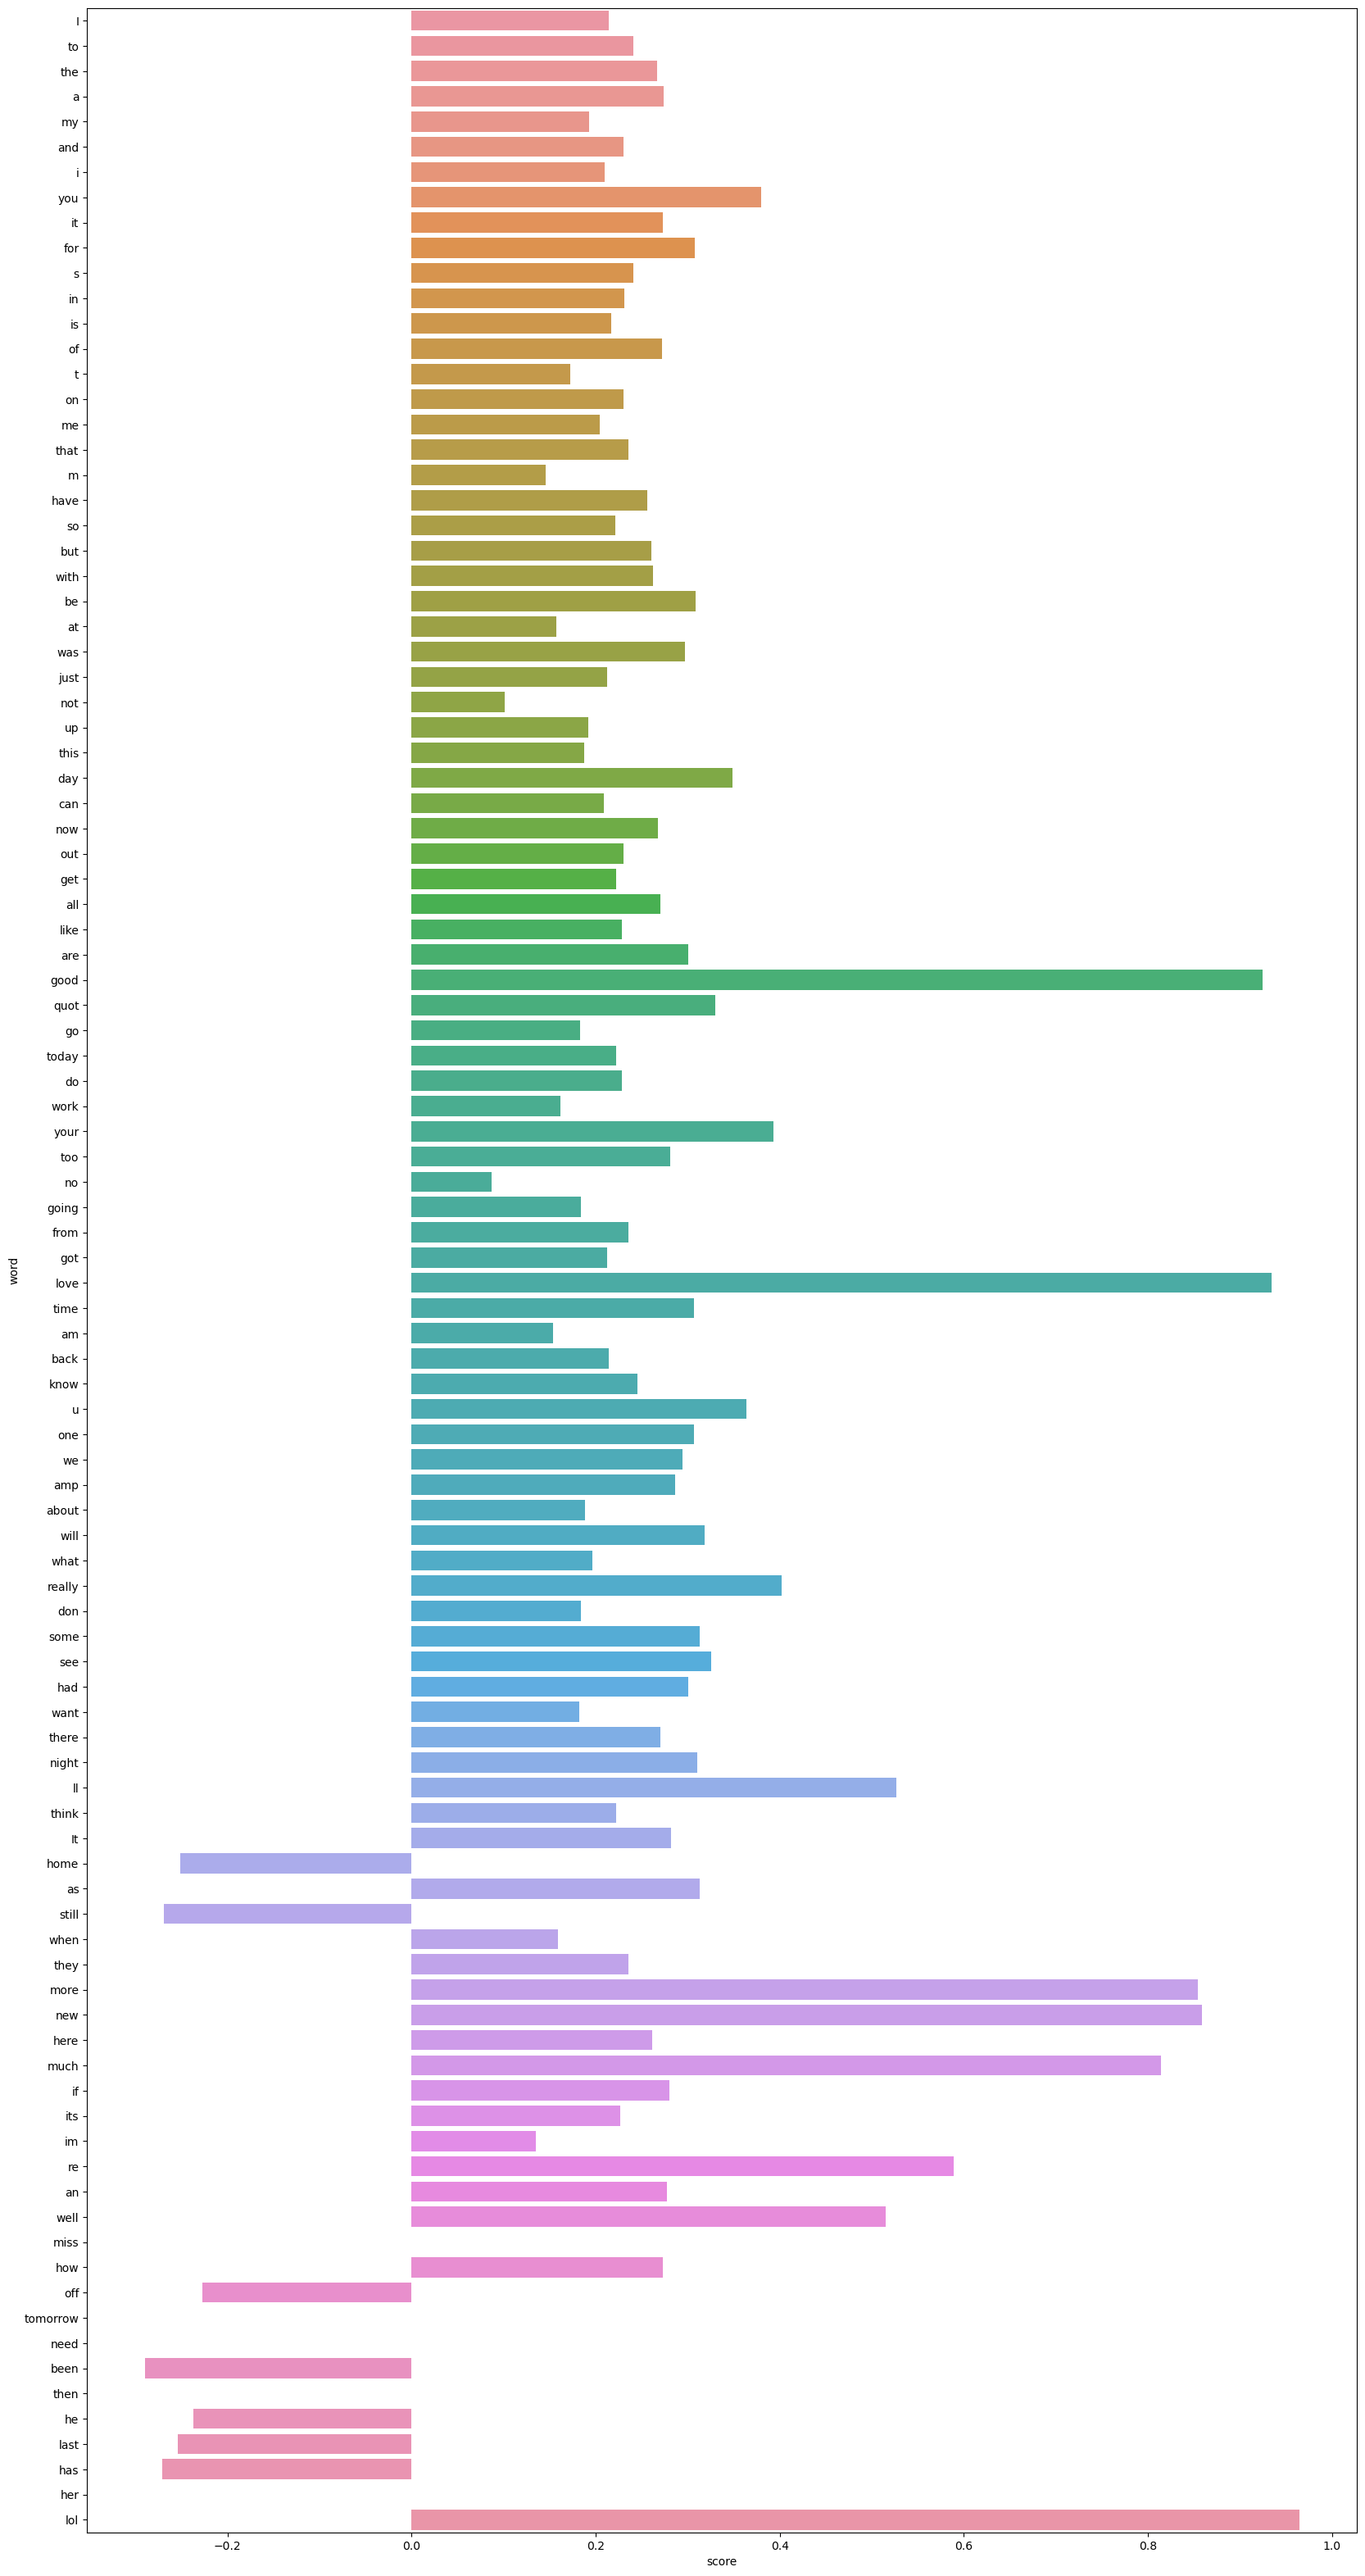

In [31]:
plt.figure(figsize = (20, 40))
sns.barplot(y="word", x="score",data=freq);

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
%matplotlib inline

# Multiplicative Decomposition 
result_mul_neg = seasonal_decompose(tweet_pivoted_hourly['Negative'], model='multiplicative', extrapolate_trend='freq')
result_mul_neut = seasonal_decompose(tweet_pivoted_hourly['Neutral'], model='multiplicative', extrapolate_trend='freq')
result_mul_pos = seasonal_decompose(tweet_pivoted_hourly['Positive'], model='multiplicative', extrapolate_trend='freq')

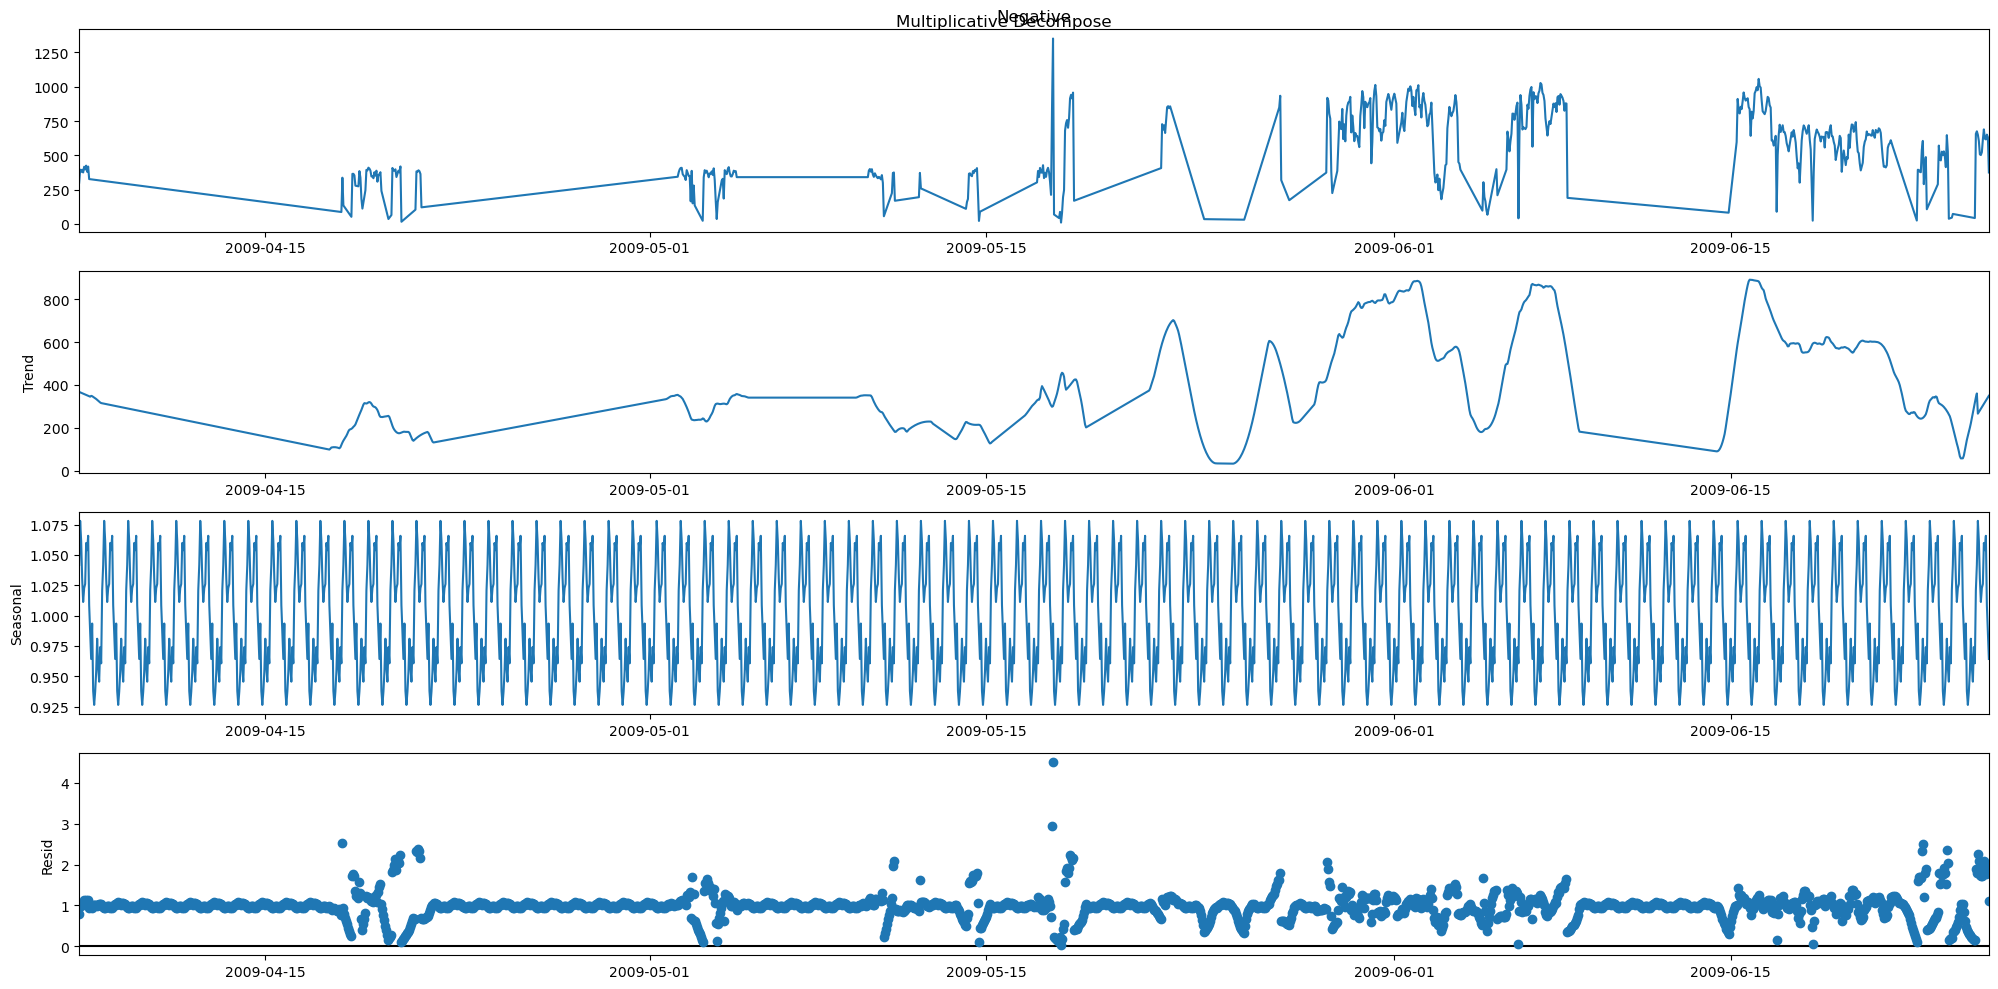

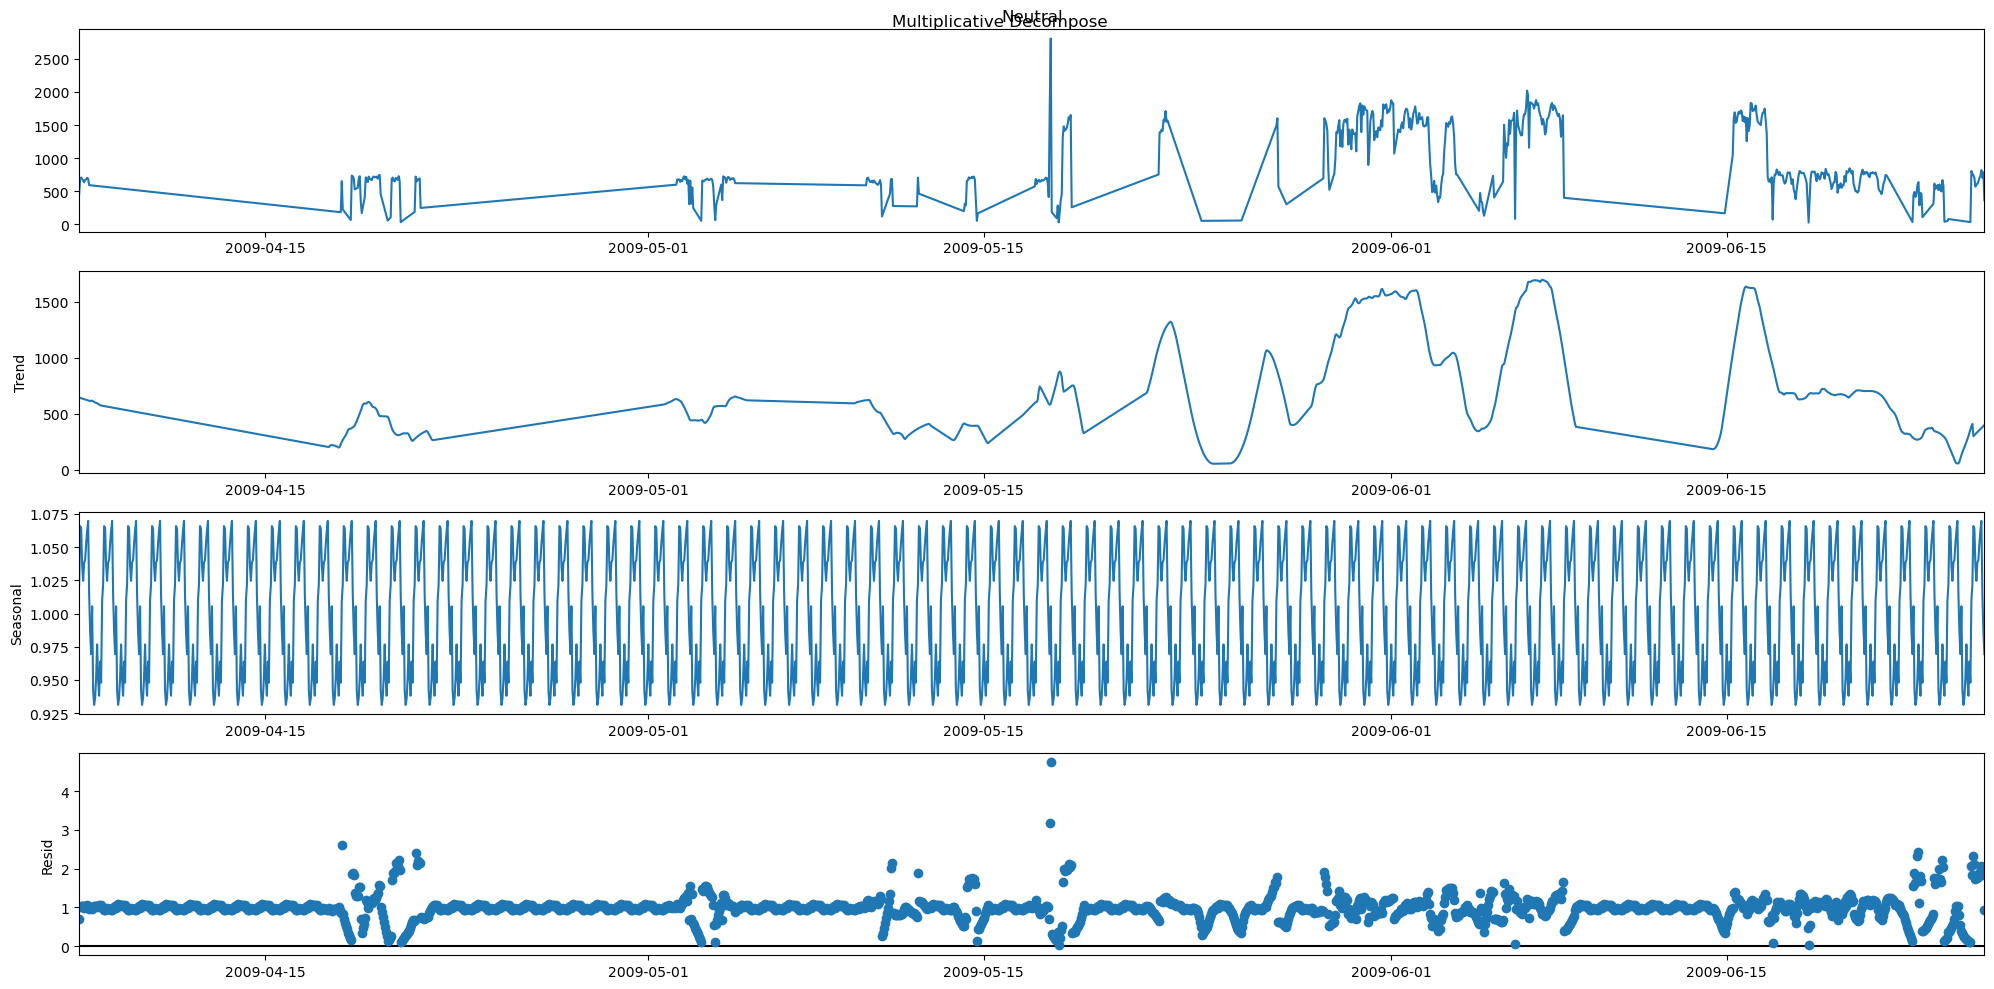

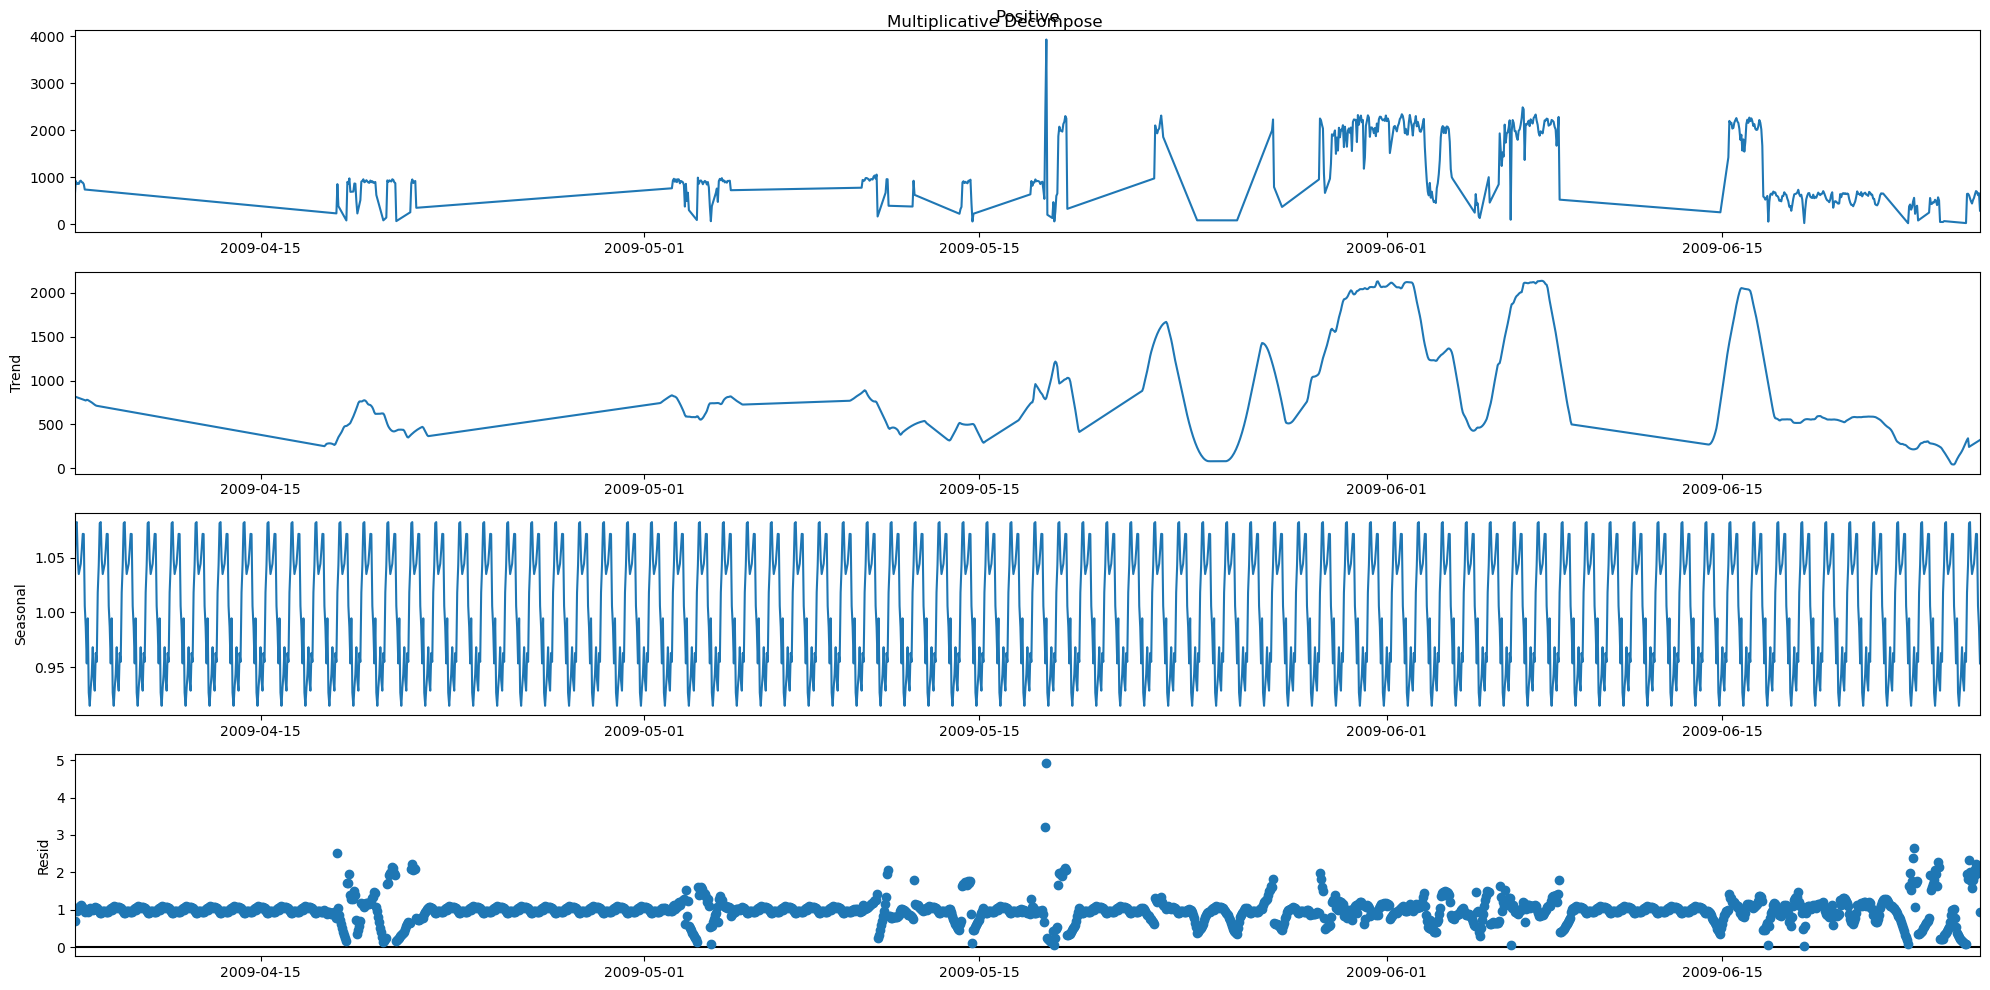

In [33]:
# Plot

plt.rcParams.update({'figure.figsize': (20,10)})

result_mul_neg.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_mul_neut.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_mul_pos.plot().suptitle('Multiplicative Decompose', fontsize=12)
plt.show()

In [34]:
result_mul_trend = pd.concat([result_mul_neg.trend, result_mul_neut.trend, result_mul_pos.trend], axis=1)
result_mul_trend.columns = ['Negative', 'Neutral', 'Positive']
result_mul_trend.head()

,Negative,Neutral,Positive
timestamp,,,
2009-04-07 06:00:00,367.741165,643.466087,818.376612
2009-04-07 07:00:00,365.718303,640.635416,814.255534
2009-04-07 08:00:00,363.695441,637.804744,810.134455
2009-04-07 09:00:00,361.672579,634.974073,806.013377
2009-04-07 10:00:00,359.649717,632.143401,801.892299


In [35]:
pos = result_mul_trend['Positive']
neutral = result_mul_trend['Neutral']
neg = result_mul_trend['Negative']

In [36]:
norm = (pos - neg) / (pos + neutral + neg)

In [37]:
result_mul_trend['score'] = norm

In [38]:
result_mul_trend['score']

timestamp
2009-04-07 06:00:00    0.246305
2009-04-07 07:00:00    0.246367
2009-04-07 08:00:00    0.246429
2009-04-07 09:00:00    0.246492
2009-04-07 10:00:00    0.246555
                         ...   
2009-06-25 14:00:00   -0.024864
2009-06-25 15:00:00   -0.024699
2009-06-25 16:00:00   -0.024541
2009-06-25 17:00:00   -0.024391
2009-06-25 18:00:00   -0.024248
Freq: H, Name: score, Length: 1909, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

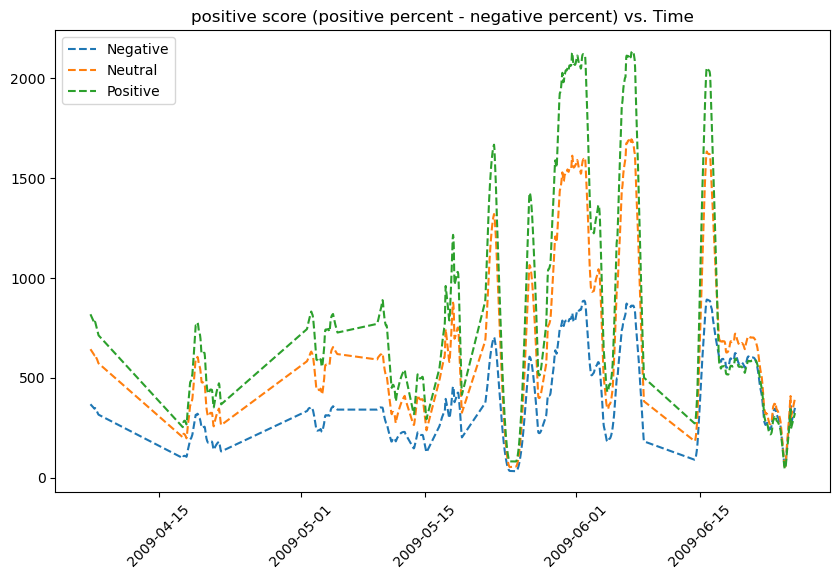

In [39]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("positive score (positive percent - negative percent) vs. Time")

plt1=plt.plot(result_mul_trend['Negative'], '--', label='Negative')
plt2=plt.plot(result_mul_trend['Neutral'], '--', label='Neutral')
plt3=plt.plot(result_mul_trend['Positive'], '--', label='Positive')

'''lin4=plt.plot(tweet_pivoted_hourly['Negative'], 'r-', label='Negative')
lin5=plt.plot(tweet_pivoted_hourly['Neutral'], 'g-', label='Neutral')
lin6=plt.plot(tweet_pivoted_hourly['Positive'], 'b-', label='Positive')'''

plt.legend()
plt.show

In [69]:
result_mul_trend.head()

,Negative,Neutral,Positive,score
timestamp,,,,
2009-04-07 06:00:00,367.741165,643.466087,818.376612,0.246305
2009-04-07 07:00:00,365.718303,640.635416,814.255534,0.246367
2009-04-07 08:00:00,363.695441,637.804744,810.134455,0.246429
2009-04-07 09:00:00,361.672579,634.974073,806.013377,0.246492
2009-04-07 10:00:00,359.649717,632.143401,801.892299,0.246555


In [70]:
filepath = "tweets_output/tweets_trend.csv"

In [71]:
result_mul_trend.to_csv(filepath)

In [41]:
tweet_forecast = result_mul_trend.drop(columns=['Negative','Neutral','Positive'])

In [42]:
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

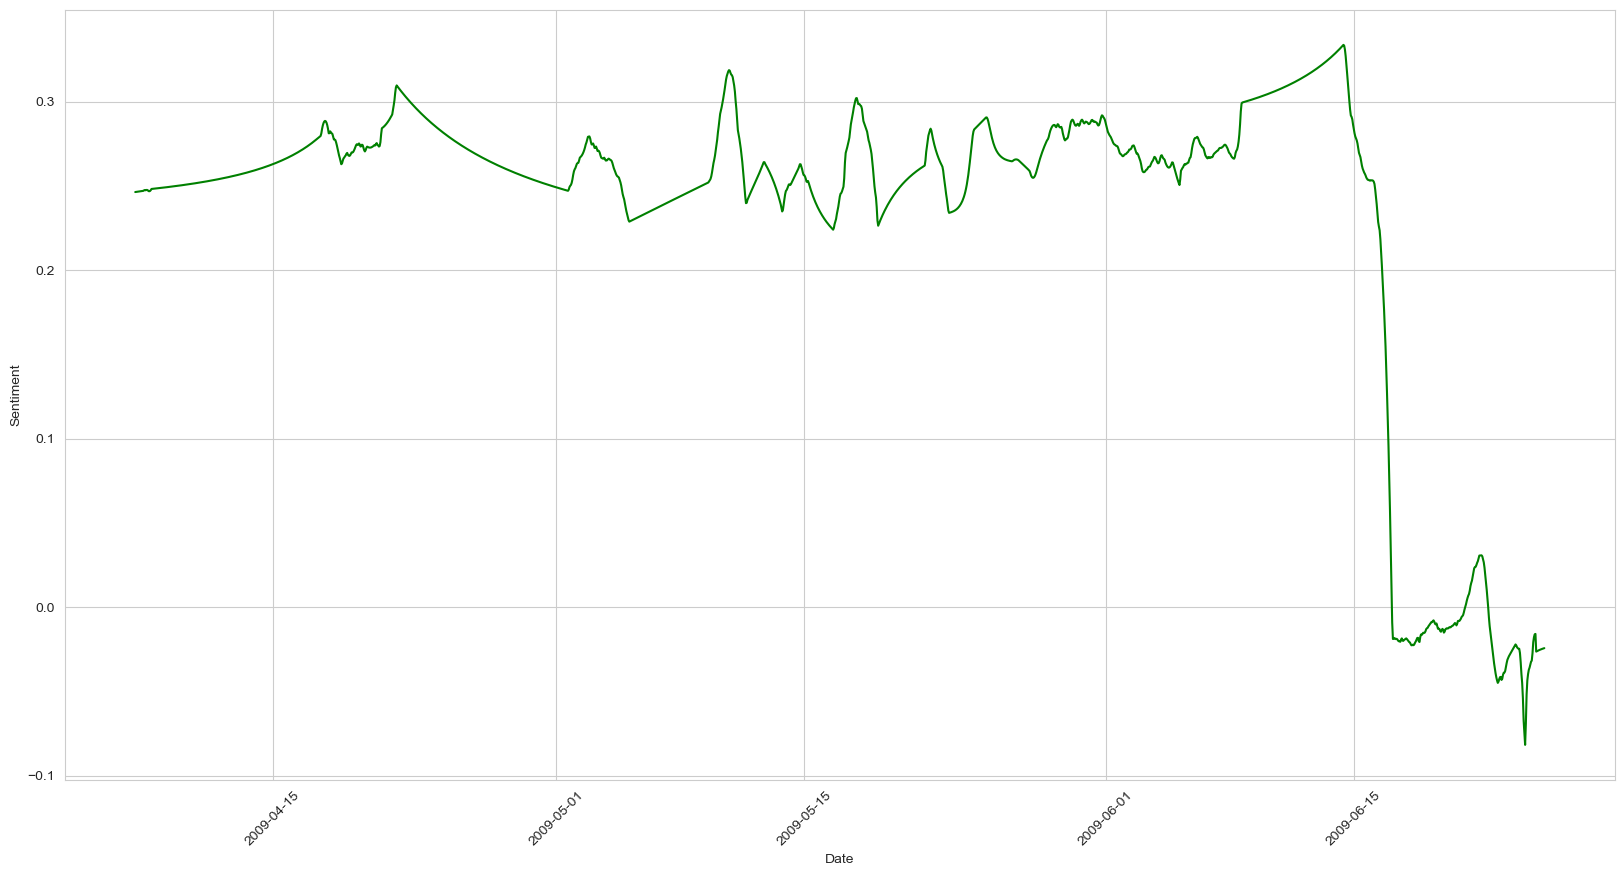

In [43]:
sns.set_style('whitegrid')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(tweet_forecast.index, tweet_forecast['score'],color='green' )
plt.show()

In [44]:
train = tweet_forecast[tweet_forecast.index < pd.to_datetime("2009-06-01 06:00:00", format='%Y-%m-%d')]
test = tweet_forecast[tweet_forecast.index >= pd.to_datetime("2009-06-01 06:00:00", format='%Y-%m-%d')]
test.head()

,score
timestamp,
2009-06-01 06:00:00,0.279504
2009-06-01 07:00:00,0.278872
2009-06-01 08:00:00,0.277925
2009-06-01 09:00:00,0.276835
2009-06-01 10:00:00,0.275688


In [45]:
train.head()

,score
timestamp,
2009-04-07 06:00:00,0.246305
2009-04-07 07:00:00,0.246367
2009-04-07 08:00:00,0.246429
2009-04-07 09:00:00,0.246492
2009-04-07 10:00:00,0.246555


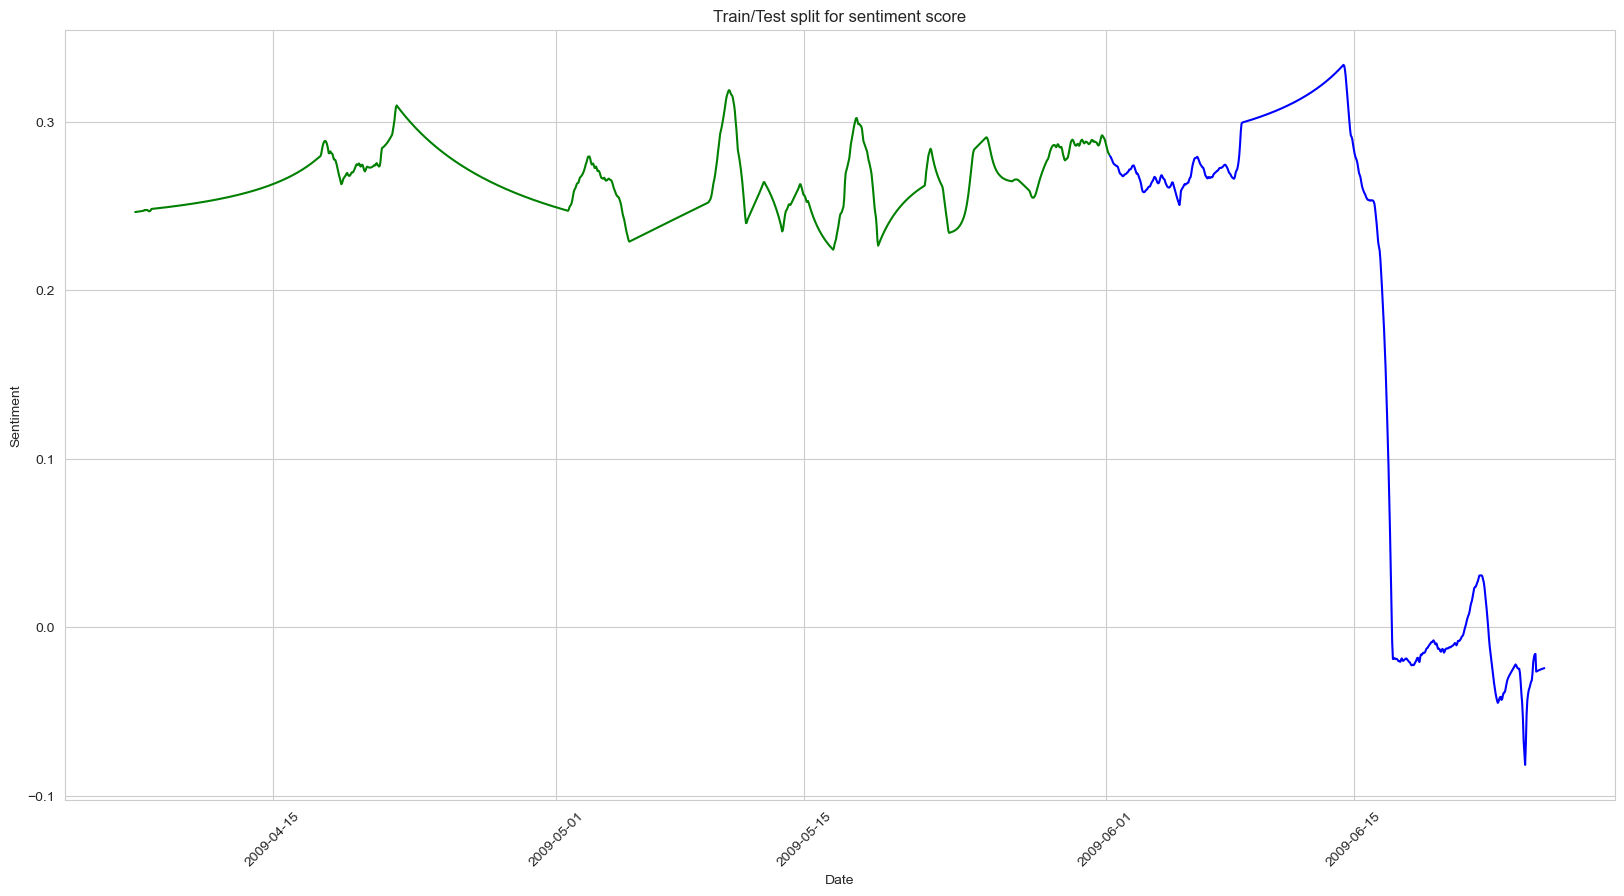

In [46]:
plt.plot(train, color = "green", label = 'Training')
plt.plot(test, color = "blue", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for sentiment score")
plt.show()

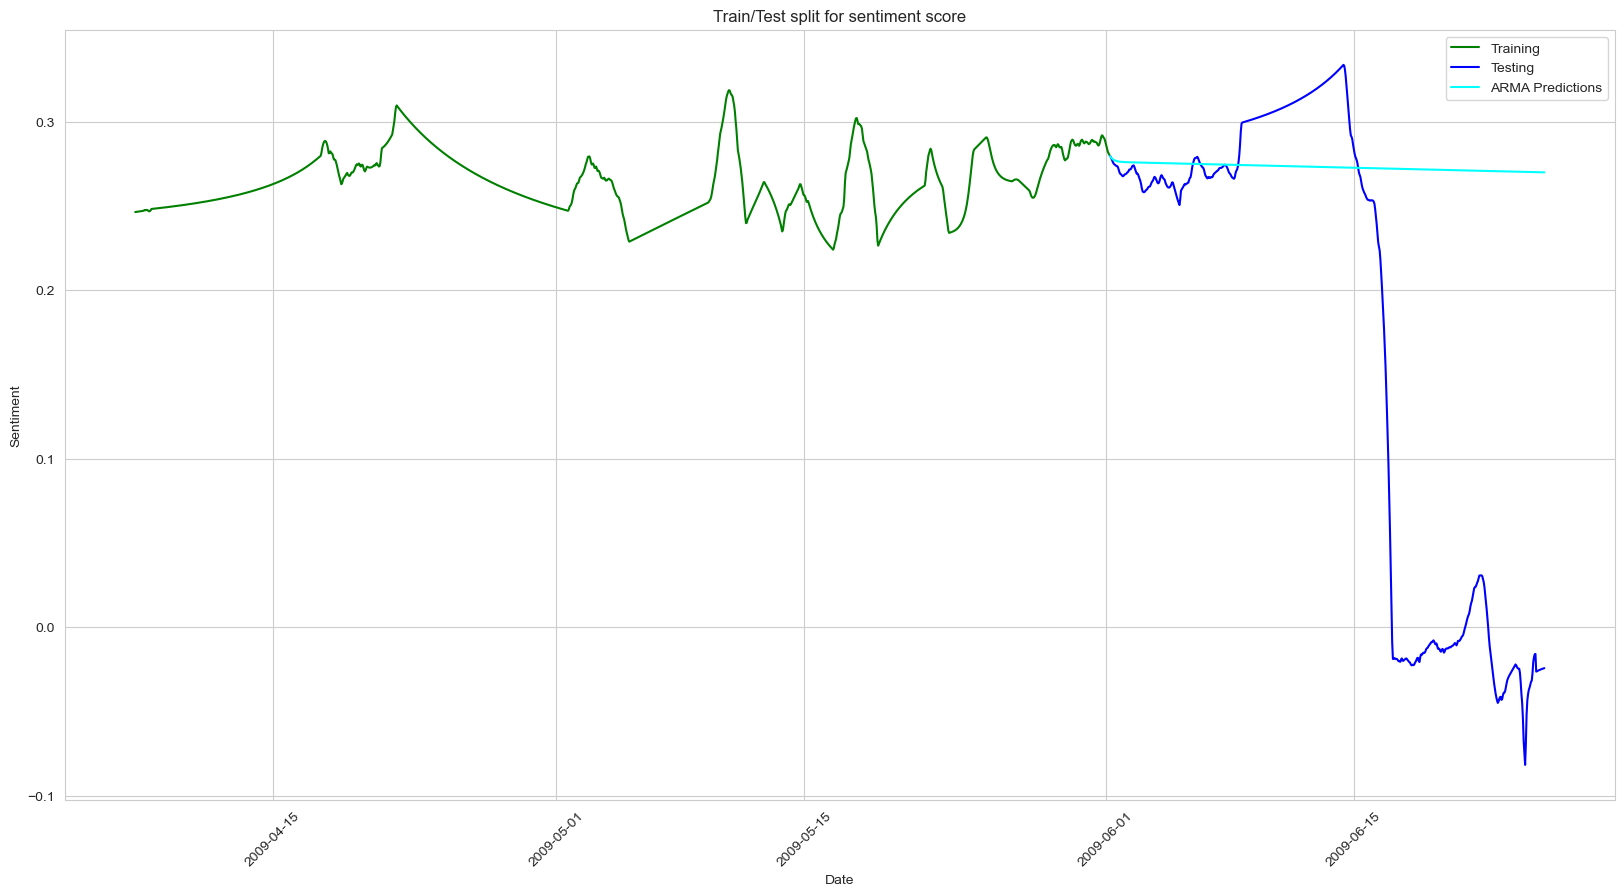

In [47]:
y = train['score']

ARMAmodel = SARIMAX(y, order = (2, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "green", label = 'Training')
plt.plot(test, color = "blue", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for sentiment score")
plt.plot(y_pred_outARMA, color='aqua', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test['score'].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

ARMA RMSE:  0.17367497004291496


In [49]:
ARIMAmodel = SARIMAX(y, order = (10, 0, 10))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0],
                                              end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARIMA = y_pred_df["Predictions"]

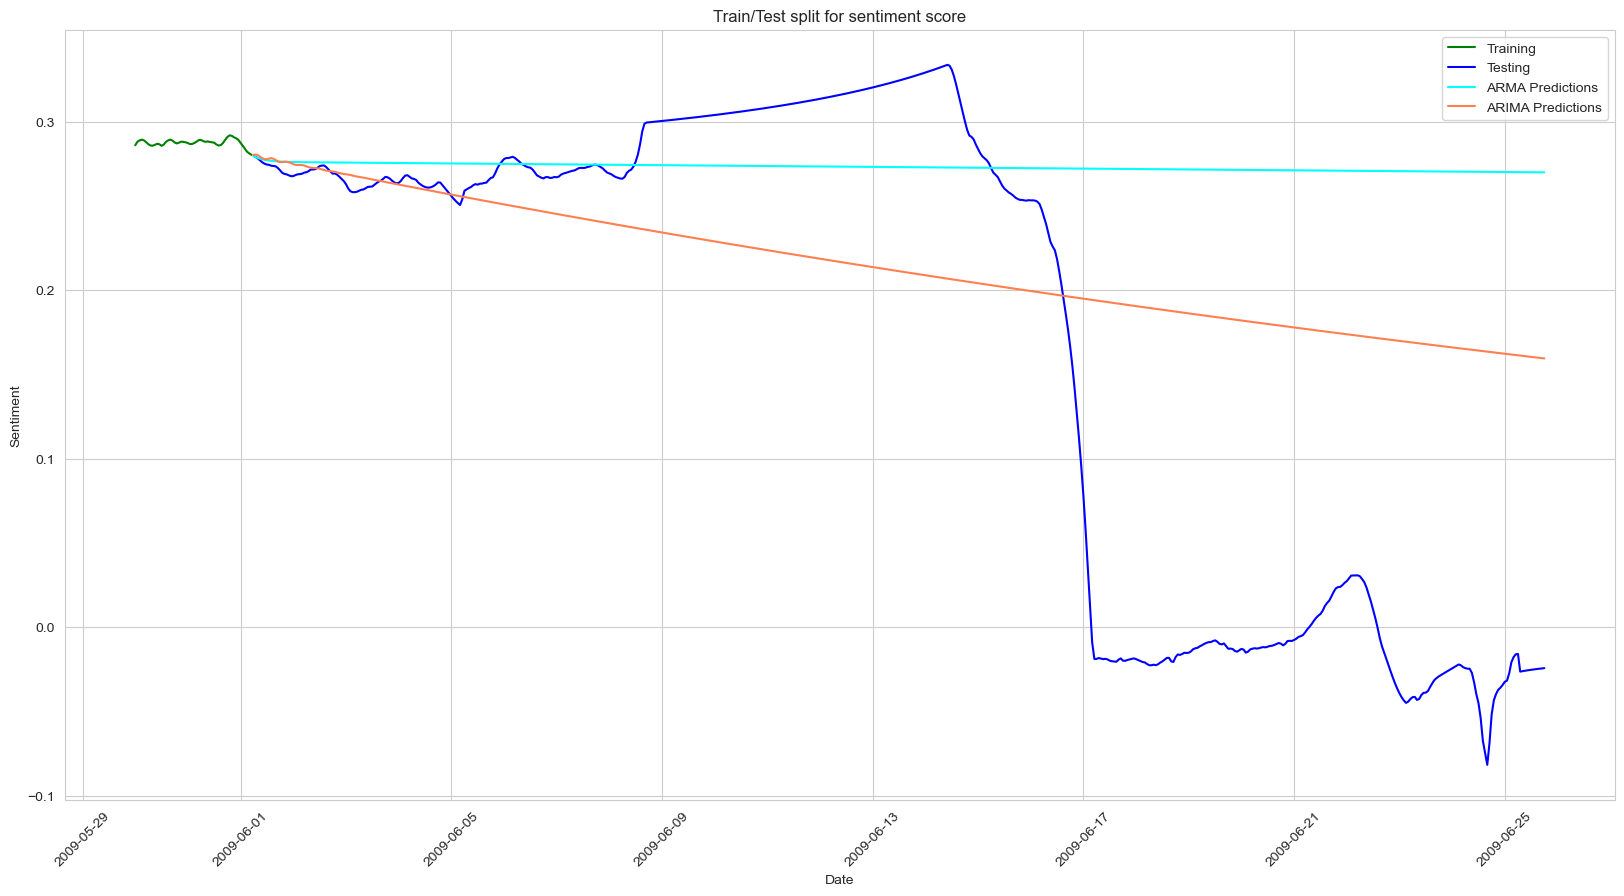

In [50]:
plt.plot(train.loc['2009-05-30':], color = "green", label = 'Training')
plt.plot(test.loc['2009-05-30':], color = "blue", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for sentiment score")
plt.plot(y_pred_outARMA.loc['2009-05-30':], color='aqua', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA.loc['2009-05-30':], color='coral', label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [51]:
arma_rmse = np.sqrt(mean_squared_error(test["score"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arma_rmse)

ARIMA RMSE:  0.12621380451883513


In [52]:
'''SARIMAXmodel = SARIMAX(y, order = (10,1,10),seasonal_order=(1,1,1,1))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0],
                                                end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outSARIMAX = y_pred_df["Predictions"] '''

'SARIMAXmodel = SARIMAX(y, order = (10,1,10),seasonal_order=(1,1,1,1))\nSARIMAXmodel = SARIMAXmodel.fit()\n\ny_pred = SARIMAXmodel.get_forecast(len(test.index))\ny_pred_df = y_pred.conf_int(alpha = 0.05) \ny_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0],\n                                                end = y_pred_df.index[-1])\ny_pred_df.index = test.index\ny_pred_outSARIMAX = y_pred_df["Predictions"] '

In [53]:
'''plt.plot(train, color = "green", label = 'Training')
plt.plot(test, color = "blue", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for sentiment score")
plt.plot(y_pred_outARMA, color='aqua', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='coral', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX, color='magenta', label = 'SARIMA Predictions')
plt.legend()
plt.show()'''

'plt.plot(train, color = "green", label = \'Training\')\nplt.plot(test, color = "blue", label = \'Testing\')\nplt.ylabel(\'Sentiment\')\nplt.xlabel(\'Date\')\nplt.xticks(rotation=45)\nplt.title("Train/Test split for sentiment score")\nplt.plot(y_pred_outARMA, color=\'aqua\', label = \'ARMA Predictions\')\nplt.plot(y_pred_outARIMA, color=\'coral\', label = \'ARIMA Predictions\')\nplt.plot(y_pred_outSARIMAX, color=\'magenta\', label = \'SARIMA Predictions\')\nplt.legend()\nplt.show()'

In [54]:
'''arma_rmse = np.sqrt(mean_squared_error(test["score"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",arma_rmse)'''

'arma_rmse = np.sqrt(mean_squared_error(test["score"].values, y_pred_df["Predictions"]))\nprint("SARIMA RMSE: ",arma_rmse)'

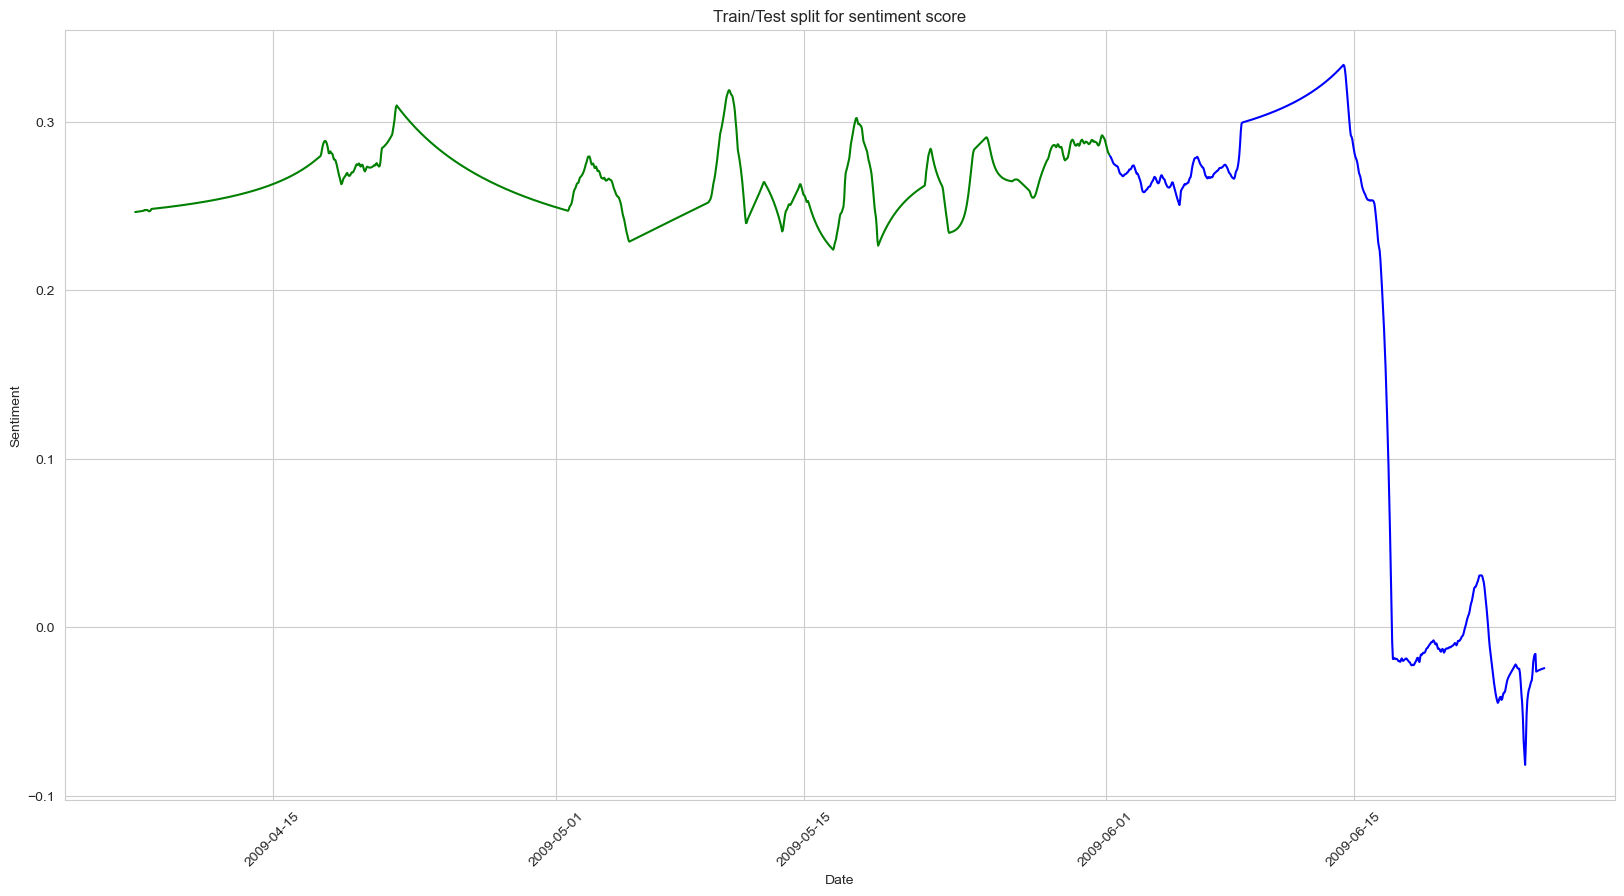

In [55]:
'''print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

fig, ax=plt.subplots(figsize=(9, 4))
train['score'].plot(ax=ax, label='train')
test['score'].plot(ax=ax, label='test')
ax.legend();'''

plt.plot(train, color = "green", label = 'Training')
plt.plot(test, color = "blue", label = 'Testing')
plt.ylabel('Sentiment')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for sentiment score")
plt.show()

In [56]:
!pip install skforecast

In [57]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
#from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

In [58]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 16
                )

forecaster.fit(y=train['score'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 
Transformer for y: None 
Transformer for exog: None 
Window size: 16 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2009-04-07 06:00:00'), Timestamp('2009-06-01 05:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: H 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-07-30 12:35:32 
Last fit date: 2023-07-30 12:35:32 
Skforecast version: 0.9.1 
Python 

In [59]:
test.shape

(589, 1)

In [60]:
# Predictions
# ==============================================================================
steps = 589
predictions = forecaster.predict(steps=steps)
predictions.tail(5)

2009-06-25 14:00:00    0.259438
2009-06-25 15:00:00    0.259404
2009-06-25 16:00:00    0.259436
2009-06-25 17:00:00    0.259390
2009-06-25 18:00:00    0.259439
Freq: H, Name: pred, dtype: float64

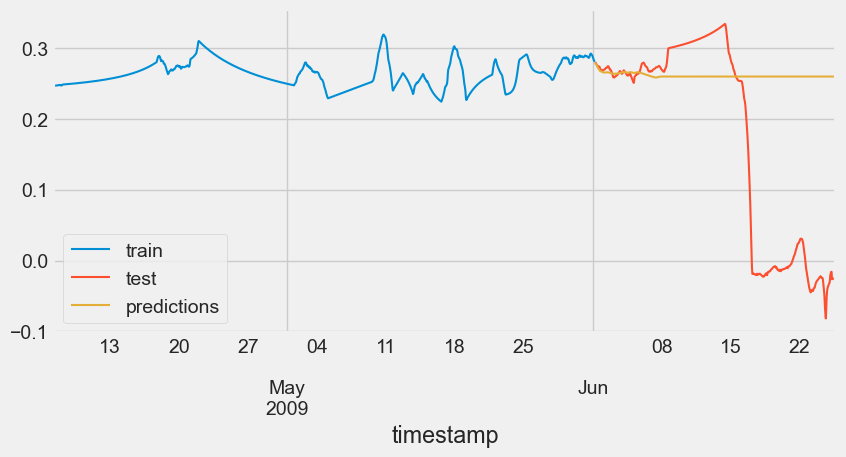

In [61]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
train['score'].plot(ax=ax, label='train')
test['score'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [62]:
#Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = test['score'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.02810790816971353


In [63]:
# Hyperparameter Grid search
# ==============================================================================
steps = 589
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [10, 20],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train['score'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 20}
  Backtesting metric: 0.0004223293521128762



In [64]:
# Grid Search results
# ==============================================================================
results_grid

,lags,params,mean_squared_error,max_depth,n_estimators
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 20}",0.000422,3,20
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 10}",0.000423,3,10
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 10}",0.000426,3,10
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 20}",0.000427,3,20
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 20}",0.000438,5,20
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 20}",0.000442,10,20
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 10}",0.000442,10,10
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 20}",0.000447,10,20
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 10}",0.000447,5,10
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 20}",0.000447,5,20


In [65]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=20, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 12
             )

forecaster.fit(y=train['score'])

In [66]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

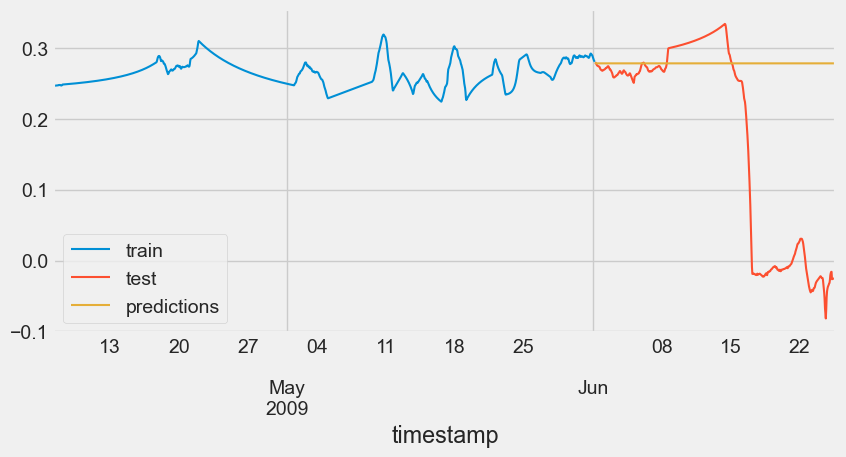

In [67]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
train['score'].plot(ax=ax, label='train')
test['score'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [68]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = test['score'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

Test error (mse): 0.03159179621777572
